<a href="https://colab.research.google.com/github/RonakReyhani/LanguageWhisperer/blob/add_amazon_polly/voice_language_whisperer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Setup
transformers_version = "v4.29.0" #@param ["main", "v4.29.0"] {allow-input: true}

print(f"Setting up everything with transformers version {transformers_version}")

!pip install huggingface_hub>=0.14.1 git+https://github.com/huggingface/transformers@$transformers_version -q diffusers accelerate datasets torch soundfile sentencepiece opencv-python openai

import IPython #allows you to work with Python interactively
import soundfile as sf #Python module for reading and writing sound files


Setting up everything with transformers version v4.29.0


In [ ]:
def play_audio(audio):
    sf.write("speech_converted.wav", audio.numpy(), samplerate=16000)  #this line of code takes audio data stored in a variable called audio and saves it as a sound file named "speech_converted.wav" with a sample rate of 16000 samples per second.
    return IPython.display.Audio("speech_converted.wav") #it creates an audio player widget that can play the audio file "speech_converted.wav. It allows you to play, pause, and control the playback of the audio file "speech_converted.wav" without leaving your code environment.


We'll start by instantiating an agent, which is a large language model (LLM). Here we use a StarCoder agent:

In [ ]:
#@title Agent init
agent_name = "StarCoder (HF Token)" #@param ["StarCoder (HF Token)", "OpenAssistant (HF Token)", "OpenAI (API Key)"]

import getpass

if agent_name == "StarCoder (HF Token)":
    from transformers.tools import HfAgent
    agent = HfAgent(url_endpoint="https://api-inference.huggingface.co/models/bigcode/starcoder", token='')
    print("StarCoder is initialized 💪")
elif agent_name == "OpenAssistant (HF Token)":
    from transformers.tools import HfAgent
    agent = HfAgent(url_endpoint="https://api-inference.huggingface.co/models/OpenAssistant/oasst-sft-4-pythia-12b-epoch-3.5")
    print("OpenAssistant is initialized 💪")
if agent_name == "OpenAI (API Key)":
    from transformers.tools import OpenAiAgent
    pswd = getpass.getpass('OpenAI API key:')
    agent = OpenAiAgent(model="text-davinci-003", api_key=pswd)
    print("OpenAI is initialized 💪")

StarCoder is initialized 💪


**Using the agent**

We have a world plenty of different objects and images. And we are able to describe all that we see in our native language. But what if we want to learn a foreign language?




In [ ]:
# function to upload the image.

def upload_files():
    from google.colab import files
    uploaded = files.upload()
    for k, v in uploaded.items():
      open(k, 'wb').write(v)
    return list(uploaded.keys())

uploaded_photos = upload_files()

Saving ai_bfast_test.png to ai_bfast_test.png


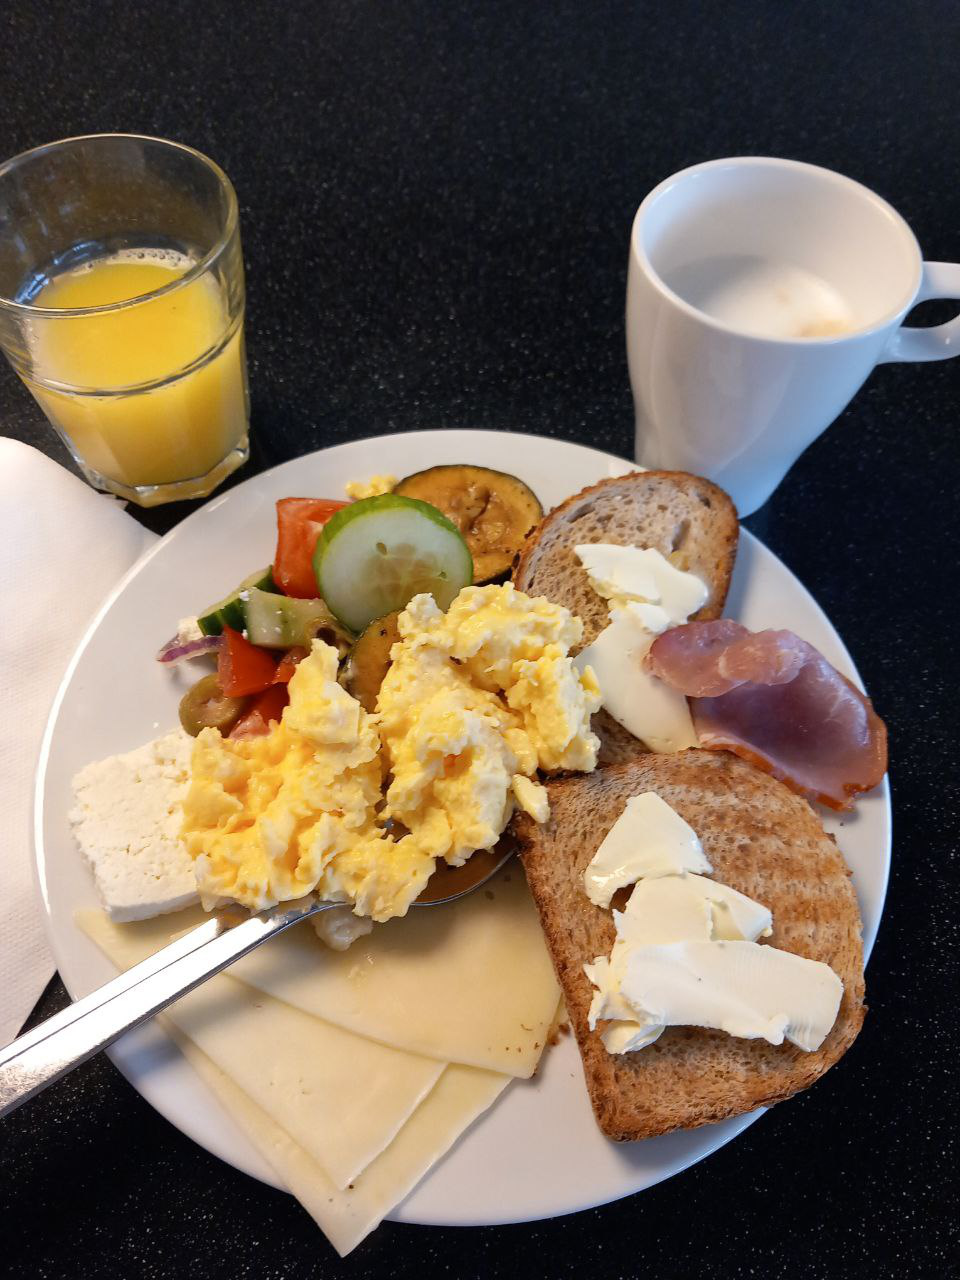

In [ ]:
# let's read the first uploaded image

from PIL import Image

# Read image
image = Image.open(uploaded_photos[0])

# Output Image
image.show()

Ok, what do we have as uploaded photo?

🍲 Some delicious food, I guess?

In [ ]:
# Running agent for generating a caption for the image (in English)

what_on_my_photo = agent.run("Generate a caption for the 'image'", image=image)
what_on_my_photo

==Explanation from the agent==
I will use the following  tool: `image_captioner` to generate a caption for the image.


==Code generated by the agent==
caption = image_captioner(image)


==Result==


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


'a plate of food with eggs, hams, and toast'

🥑 Let's discover how to describe it in a language we want to learn!

Note: the language list is taken from here: https://ai.facebook.com/research/no-language-left-behind/#200-languages-accordion

In [ ]:
list_of_supported_languages = ['Acehnese', 'Arabic', 'Afrikaans', 'Akan', 'Amharic', 'Assamese', 'Asturian', 'Awadhi', 'Aymara', 'Chinese',
                               'Crimean Tatar', 'Welsh', 'Danish', 'German', 'French', 'Friulian', 'Fulfulde', 'Dinka', 'Dyula',
                               'Dzongkha', 'Greek', 'English', 'Esperanto', 'Estonian', 'Basque', 'Ewe', 'Faroese', 'Iranian Persian',
                               'Icelandic', 'Italian', 'Javanese', 'Japanese', 'Kabyle', 'Kachin', 'Kamba', 'Kannada', 'Kashmiri', 'Georgian',
                               'Kanuri', 'Kazakh', 'Kabiye', 'Thai', 'Khmer', 'Kikuyu', 'South Azerbaijani', 'North Azerbaijani', 'Bashkir', 'Bambara',
                               'Balinese', 'Belarusian', 'Bemba', 'Bengali', 'Bhojpuri', 'Banjar', 'Tibetan', 'Bosnian', 'Buginese', 'Bulgarian',
                               'Catalan', 'Cebuano', 'Czech', 'Chokwe', 'Central Kurdish', 'Fijian', 'Finnish', 'Fon', 'Scottish Gaelic',
                               'Irish', 'Galician', 'Guarani', 'Gujarati', 'Haitian Creole', 'Hausa', 'Hebrew', 'Hindi', 'Chhattisgarhi',
                               'Croatian', 'Hungarian', 'Armenian', 'Igobo', 'IIocano', 'Indonesian', 'Kinyarwanda', 'Kyrgyz', 'Kimbundu',
                               'Konga', 'Korean', 'Kurdish', 'Lao', 'Latvian', 'Ligurian', 'Limburgish', 'Lingala', 'Lithuanian',
                               'Lombard', 'Latgalian', 'Luxembourgish', 'Luba-Kasai', 'Ganda', 'Dholuo', 'Mizo', 'Swedish', 'Spanish']

In [ ]:
# Running agent for translating the caption to a language of choice
# target_language could be passed from UI (see list_of_supported_languages above)


def translate_captions(target_language, caption):
    return agent.run(f"Can you translate 'caption' to {target_language}?", caption=caption)


target_language_caption = translate_captions(target_language=input("Select a language: "), caption=what_on_my_photo)
target_language_caption

Select a language: Spanish
==Explanation from the agent==
I will use the following  tool: `translator` to translate the caption into Spanish.


==Code generated by the agent==
spanish_caption = translator(caption, src_lang="English", tgt_lang="Spanish")
print(f"The Spanish caption is {spanish_caption}.")


==Result==


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (200) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


The Spanish caption is un plato de comida con huevos, jamones y tostadas.


'un plato de comida con huevos, jamones y tostadas'

And now, let's try to pronounce it like a true native speaker! ✌

Note: for better results here we can use Amazon Polly for voicing.

In [ ]:
# Running agent for generating an audio for translated caption (we can try Amazon Polly here)

# audio = agent.run("Read out loud the 'translated_sentence'", translated_sentence=target_language_caption)
# play_audio(audio)

==Explanation from the agent==
I will use the following  tools: `text_reader` to read the sentence out loud, then `translator` to translate it into English.


==Code generated by the agent==
audio_sentence = text_reader(translated_sentence)


==Result==


Generating validation split: 0 examples [00:00, ? examples/s]

Dataset cmu-arctic-xvectors downloaded and prepared to /root/.cache/huggingface/datasets/Matthijs___cmu-arctic-xvectors/default/0.0.1/a62fea1f9415e240301ea0042ffad2a3aadf4d1caa7f9a8d9512d631723e781f. Subsequent calls will reuse this data.


In [ ]:
#AMAZON POLLY IMPLEMENTATION

# allow me to use boto3 to access polly
import os

requisite='boto3'
os.system(f"pip install {requisite}")

0

In [ ]:
#modules needed
import boto3 #
from boto3 import Session
from botocore.exceptions import BotoCoreError, ClientError #need to handle errors
from contextlib import closing
import sys
import subprocess
from tempfile import gettempdir

In [ ]:
#To access my AWS Account, I have to install the AWS CLI

!pip install awscli

from IPython.display import clear_output
clear_output()





In [ ]:
!aws configure

/bin/bash: aws: command not found


In [ ]:
from typing import Text

from botocore.config import Config

my_config = Config(
    region_name = 'us-east-1',
    signature_version = 'v4',
    retries = {
        'max_attempts': 10,
        'mode': 'standard'
    }
)


polly = boto3.client('polly', config=my_config)

try:
  response = polly.synthesize_speech(Text='I love You Test Test Test', OutputFormat='mp3', VoiceId='Joanna')
except (BotoCoreError, ClientError) as error:
  print(error)
  sys.exit(-1)

#Access the audio stream from the response
if 'AudioStream' in response:
        with closing(response['AudioStream']) as stream:
          output = os.path.join(gettempdir(), 'speech.mp3')
          try:
            #Open a file for writing the output as a binary stream
            with open(output,'wb') as file:
              file.write(stream.read())
          except IOError as error:
            #Could not write to file, exit
            print(error)
            sys.exit(-1)
else:
  #print this if the response didnt contain audio data, exit gracefully
  print('Could not stream audio')


#Play the audio using the platform's default player
if sys.platform == 'Darwin':
  os.startfile(output)
else:
  # The following works on MacOS and Linux (Darwin = mac, xdg-open = linux)
  opener = 'open' if sys.platform == 'win32' else 'xdg-open'
  subprocess.call([opener, output])


In [ ]:
!pip install pygame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tempfile
import os
import sys
from botocore.exceptions import BotoCoreError, ClientError
from botocore.config import Config
import boto3
from contextlib import closing
from pydub import AudioSegment
from IPython.display import Audio

my_config = Config(
    region_name='us-east-1',
    signature_version='v4',
    retries={
        'max_attempts': 10,
        'mode': 'standard'
    }
)

polly = boto3.client('polly', config=my_config)

try:
    response = polly.synthesize_speech(Text=target_language_caption, OutputFormat='mp3', VoiceId='Penelope')
except (BotoCoreError, ClientError) as error:
    print(error)
    sys.exit(-1)

# Access the audio stream from the response
if 'AudioStream' in response:
    with closing(response['AudioStream']) as stream:
        output_directory = tempfile.gettempdir()
        output = os.path.join(output_directory, 'speech.mp3')
        try:
            # Open a file for writing the output as a binary stream
            with open(output, 'wb') as file:
                file.write(stream.read())
            print("Audio file saved to:", output)  # Print the path where the file is saved
        except IOError as error:
            # Could not write to file, exit
            print(error)
            sys.exit(-1)
else:
    # Print this if the response didn't contain audio data, exit gracefully
    print('Could not stream audio')

# Convert the audio file to WAV format using pydub
audio = AudioSegment.from_mp3(output)
output_wav = os.path.join(output_directory, 'speech.wav')
audio.export(output_wav, format='wav')

# Play the audio in the Colab notebook using IPython.display.Audio
Audio(output_wav)



Audio file saved to: /tmp/speech.mp3
